# Đồ án cuối kỳ

## 1. Thu thập dữ liệu

Tập [dữ liệu](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) này bao gồm dữ liệu về vị trí của sinh viên trong khuôn viên trường. Nó bao gồm tỷ lệ phần trăm trung học cơ sở trở lên và chuyên môn hóa. Nó cũng bao gồm chuyên môn hóa bằng cấp, loại hình và kinh nghiệm làm việc cũng như đề nghị trả lương cho các sinh viên được sắp xếp.

## 2. Khám phá dữ liệu

### Các thư viện cần thiết

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Final_Project//'

Mounted at /content/drive


### Đọc dữ liệu

In [ ]:
df = pd.read_csv(folder_path + 'Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Kích thước dữ liệu

In [ ]:
num_rows = df.shape[0]
print("Số dòng: ",num_rows)
num_cols = df.shape[1]
print("Số cột: ",num_cols)

Số dòng:  215
Số cột:  15


### Các giá trị trùng trong dữ liệu

In [ ]:
have_duplicated_rows = df.duplicated().sum()
have_duplicated_rows

0

### Ý nghĩa của các cột

- **sl_no**: Mã phân biệt mỗi học sinh.
- **gender**: Giới tính (M - con trai và F - con gái).
- **ssc_p**: Điểm lớp 10.
- **ssc_b**: Hội đồng giáo dục trường cấp 2.
- **hsc_p**: Điểm lớp 12.
- **hsc_b**: Hội đồng giáo dục trường cấp 3.
- **hsc_s**: Chuyên ngành trường cấp 3.
- **degree_p**: Điểm bằng đại học.
- **degree_t**: Lĩnh vực học.
- **workex**: Kinh nghiệm làm việc.
- **etest_p**: Điểm bài kiểm tra nhân sự.
- **specialisation**: Chuyên ngành sau đại học (MBA).
- **mba_p**: Điểm MBA (Master of Business Administration)[See more](https://www.mba.com/explore-programs/choose-and-compare-programs/what-is-an-mba). 
- **status**: Tình trạng công việc.
- **salary**: Tiền lương.

### Các giá trị rỗng

In [ ]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

Kiểm tra có dòng nào không thoả điều kiện nếu học sinh không có việc làm thì sẽ không có lương hay không?

In [ ]:
df[(df.status == "Not Placed") & (df.salary.notna())].shape[0]

In [ ]:
df['salary'].fillna(value = 0, inplace = True)
df

### Đặc trưng của dữ liệu

#### Kiểu dữ liệu

In [ ]:
value = df.dtypes
key = df.columns.values
col_dtypes = dict(zip(key,value))
col_dtypes

{'degree_p': dtype('float64'),
 'degree_t': dtype('O'),
 'etest_p': dtype('float64'),
 'gender': dtype('O'),
 'hsc_b': dtype('O'),
 'hsc_p': dtype('float64'),
 'hsc_s': dtype('O'),
 'mba_p': dtype('float64'),
 'salary': dtype('float64'),
 'sl_no': dtype('int64'),
 'specialisation': dtype('O'),
 'ssc_b': dtype('O'),
 'ssc_p': dtype('float64'),
 'status': dtype('O'),
 'workex': dtype('O')}

#### Kiểu dữ liệu số

In [ ]:
numerical_df = df.select_dtypes(exclude='object')
numerical_df =numerical_df.drop(columns=['sl_no'])
numerical_df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


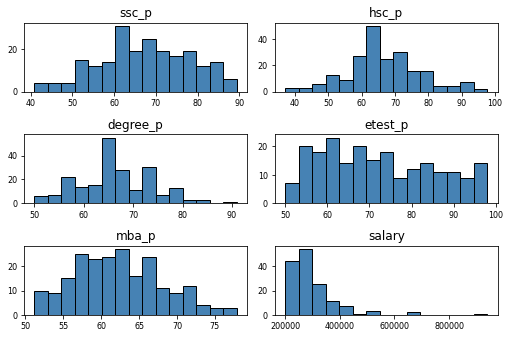

In [ ]:
numerical_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

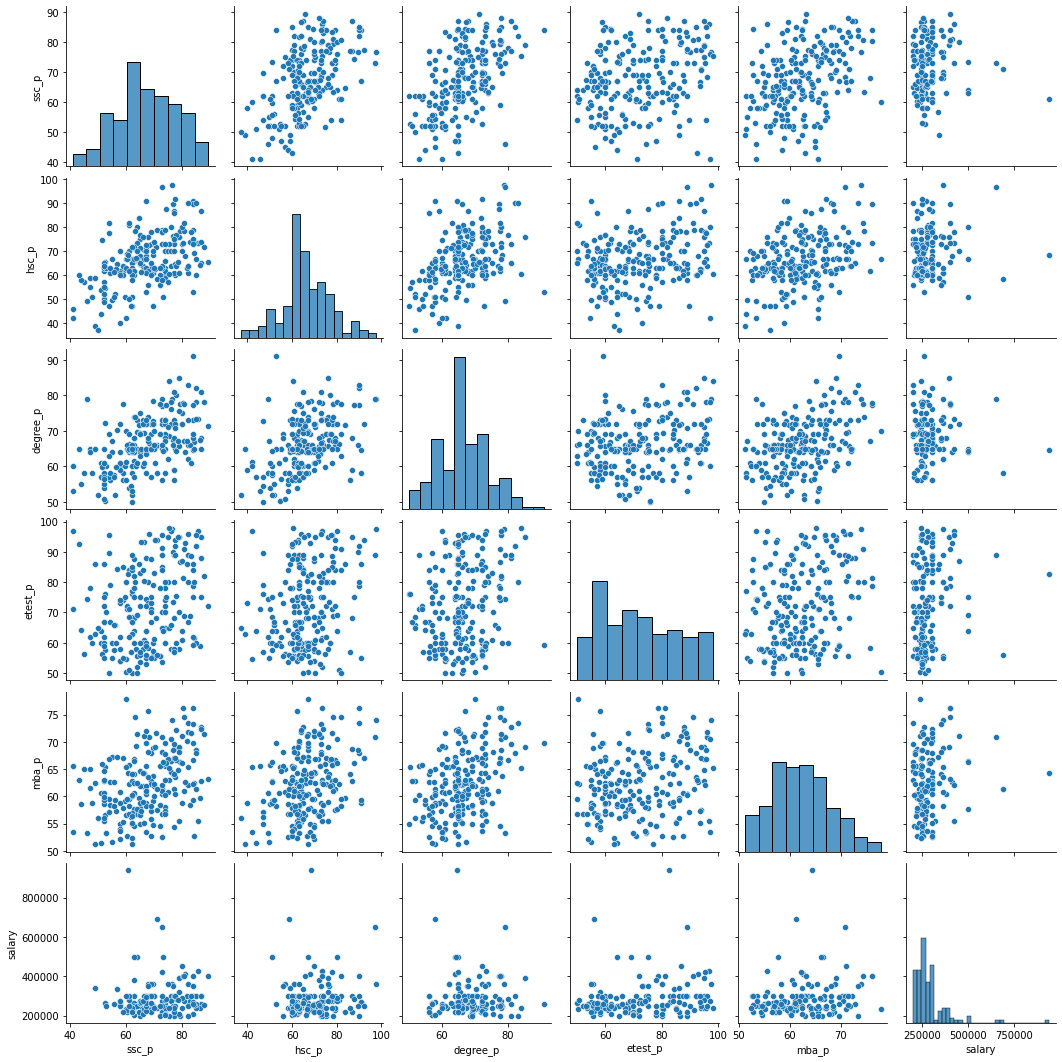

In [ ]:
sns.pairplot(data=numerical_df,palette="Blues_d")

Độ tương quan giữa các thuộc tính số trong dữ liệu

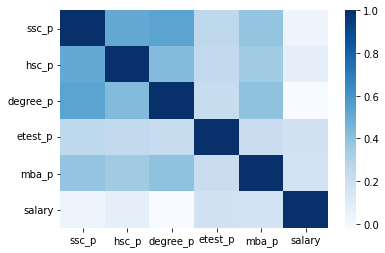

In [ ]:
sns.heatmap(numerical_df.corr(),cmap="Blues")

**NHẬN XÉT:**

Từ biểu diễn bên trên ta có thể suy ra các thuộc tính số trong dữ liệu không có tương quan dương với nhau nên không cần loại bỏ bất kỳ dòng dữ liệu nào.

#### Kiểu dữ liệu chuỗi

In [ ]:
categorical_df = df.select_dtypes(include='object')
categorical_df.dtypes

gender            object
ssc_b             object
hsc_b             object
hsc_s             object
degree_t          object
workex            object
specialisation    object
status            object
dtype: object

Giới tính

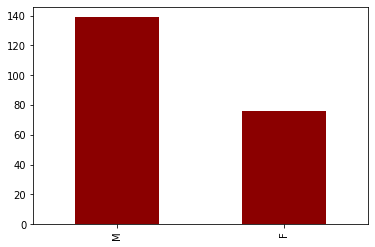

In [ ]:
categorical_df['gender'].value_counts().plot.bar(color='darkred')

Hội đồng giáo dục trường cấp 2

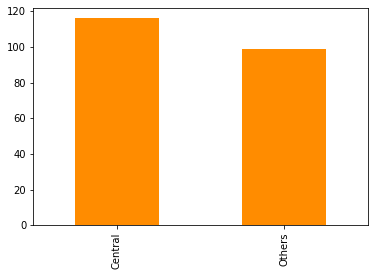

In [ ]:
categorical_df['ssc_b'].value_counts().plot.bar(color='darkorange')

Hội đồng giáo dục trường cấp 3

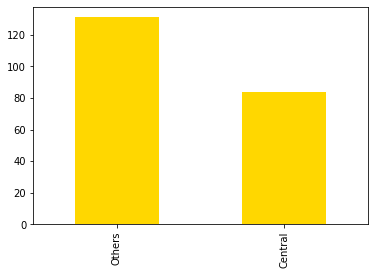

In [ ]:
categorical_df['hsc_b'].value_counts().plot.bar(color='gold')

Chuyên ngành cấp 3

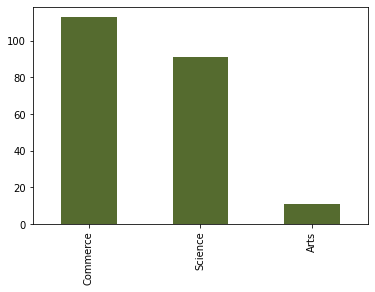

In [ ]:
categorical_df['hsc_s'].value_counts().plot.bar(color='darkolivegreen')

Lĩnh vực học

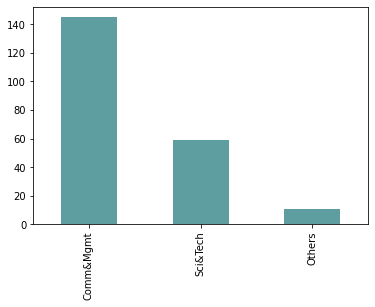

In [ ]:
categorical_df['degree_t'].value_counts().plot.bar(color='cadetblue')

Kinh nghiệm làm việc

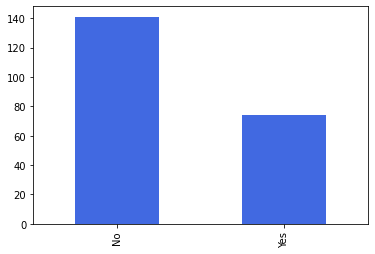

In [ ]:
categorical_df['workex'].value_counts().plot.bar(color='royalblue')

Chuyên ngành sau đại học (MBA)

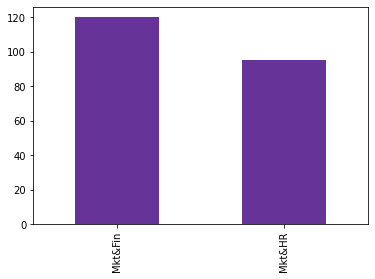

In [ ]:
categorical_df['specialisation'].value_counts().plot.bar(color='rebeccapurple')

Tình trạng công việc

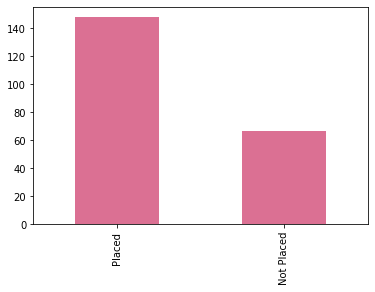

In [ ]:
categorical_df['status'].value_counts().plot.bar(color='palevioletred')

## 3. Đặt câu hỏi

### 3.1 Mẫu phổ biến của các học sinh có việc làm ?
Mẫu phổ biến còn có thể hiểu là các đặc trưng phổ biến trong nhóm các học sinh có việc làm trong trường đại học A. Việc tìm ra được các đặc trưng này sẽ giúp cho học sinh có cơ sở và định hướng rõ ràng trong việc lựa chọn các chuyên ngành trong tương lai và biết được cần cố gắng ở những khía cạnh nào để đạt được kết quả như mong đợi.

### 3.2 Liệu rằng giới tính của sinh viên có ảnh hưởng tới lương và tình trạng có việc làm ?

### 3.3 Tìm hiểu xem kinh nghiệm có là yếu tố ảnh hưởng tới việc làm của sinh viên ?

### 3.4 

## 4. Tiền xử lý dữ liệu

Nếu để ý kĩ thì tất cả các cột dữ liệu số trong tập dữ liệu đều là điểm số của học sinh lần lượt ở năm lớp 10, lớp 12, đại học và sau đại học. Có thể thấy việc phân tích các giá trị liên tục trong trường hợp này khá phức tạp và mang lại ít giá trị hữu ích cộng thêm việc các giá trị điểm này đã được rời rạc hoá dưới dạng phân loại:
 * A	90%-100%
 * B	80%–89%
 * C	70%–79%
 * D	60%–69%
 * F	0%-59%

In [ ]:
def s(x):
  if x >= 90.0:
    return 'A'
  elif x >= 80.0:
    return 'B'
  elif x >= 70.0:
    return 'C'
  elif x >= 60.0:
    return 'D'
  else:
    return 'F'
col = numerical_df.drop(columns=['salary']).columns
for i in col:
  df[i] = df[i].apply(s)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,D,Others,A,Others,Commerce,F,Sci&Tech,No,F,Mkt&HR,F,Placed,270000.0
1,2,M,C,Central,C,Others,Science,C,Sci&Tech,Yes,B,Mkt&Fin,D,Placed,200000.0
2,3,M,D,Central,D,Central,Arts,D,Comm&Mgmt,No,C,Mkt&Fin,F,Placed,250000.0
3,4,M,F,Central,F,Central,Science,F,Sci&Tech,No,D,Mkt&HR,F,Not Placed,NaN
4,5,M,B,Central,C,Central,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,F,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,B,Others,B,Others,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,C,Placed,400000.0
211,212,M,F,Others,D,Others,Science,C,Sci&Tech,No,C,Mkt&Fin,F,Placed,275000.0
212,213,M,D,Others,D,Others,Commerce,C,Comm&Mgmt,Yes,F,Mkt&Fin,D,Placed,295000.0
213,214,F,C,Others,D,Others,Commerce,F,Comm&Mgmt,No,C,Mkt&HR,D,Placed,204000.0


### Các dữ liệu phân loại mới có gì ?

Điểm lớp 10

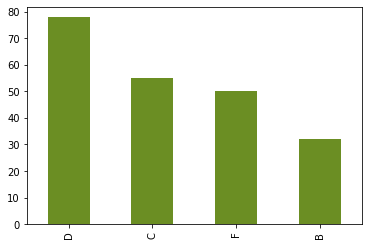

In [ ]:
df['ssc_p'].value_counts().plot.bar(color='olivedrab')

Điểm 12

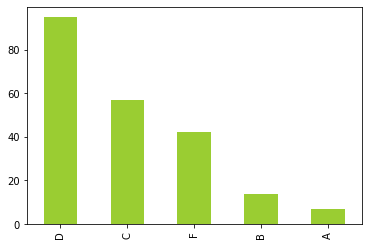

In [ ]:
df['hsc_p'].value_counts().plot.bar(color='yellowgreen')

Điểm đại học

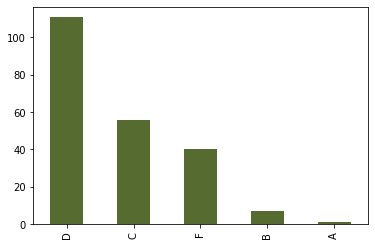

In [ ]:
df['degree_p'].value_counts().plot.bar(color='darkolivegreen')

Điểm bài kiểm tra nhân sự

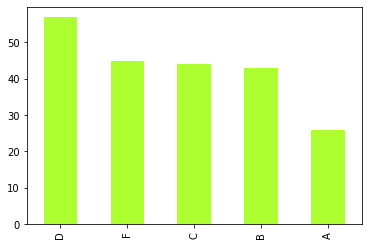

In [ ]:
df['etest_p'].value_counts().plot.bar(color='greenyellow')

Điểm sau đại học

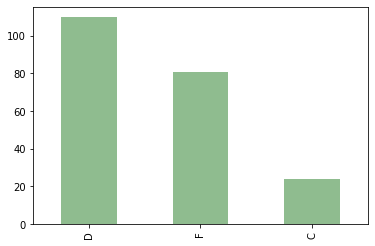

In [ ]:
df['mba_p'].value_counts().plot.bar(color='darkseagreen')

## 6. Trả lời câu hỏi

In [ ]:
frequency_item_df = df[df['status'] == 'Placed'].drop(columns = ['sl_no', 'gender', 'ssc_b', 'hsc_b', 'status','salary'])
frequency_item_df = frequency_item_df.value_counts().reset_index(name = 'count')

In [ ]:
frequency_item_df = frequency_item_df[frequency_item_df['count'] >= frequency_item_df['count'].max()]
frequency_item_df

In [ ]:
placed_df = df[df['status'] == 'Placed']
sns.boxplot(x=placed_df['gender'], y = placed_df['salary'], hue='specialisation', data=placed_df)
plt.title("Salary vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Salary of an candidate")
plt.show()

NameError: ignored

Theo biểu đồ ở trên, những điểm nhiễu hoặc giá trị cực đoan trong cột lương nằm ở nam nhiều hơn nữ. Một trong những giả định có thể là một số ứng viên nam được tuyển dụng vào vị trí cao hơn trong một công ty, đó là lý do tại sao họ nhận được nhiều lương hơn.

## 5. Reflection